## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}

for bs in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BATCH_SIZE = %d" % (bs))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=bs, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name_tag = "bs-%d" % bs
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with BATCH_SIZE = 2
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch

50000/50000 [==============================] - 298s 6ms/step - loss: 2.2818 - accuracy: 0.1290 - val_loss: 134.1388 - val_accuracy: 0.1428
Epoch 46/50
50000/50000 [==============================] - 297s 6ms/step - loss: 2.2861 - accuracy: 0.1277 - val_loss: 27.8202 - val_accuracy: 0.1566
Epoch 47/50
50000/50000 [==============================] - 298s 6ms/step - loss: 2.2833 - accuracy: 0.1301 - val_loss: 58.9478 - val_accuracy: 0.1622
Epoch 48/50
50000/50000 [==============================] - 303s 6ms/step - loss: 2.2834 - accuracy: 0.1305 - val_loss: 144.5337 - val_accuracy: 0.1650
Epoch 49/50
50000/50000 [==============================] - 304s 6ms/step - loss: 2.2838 - accuracy: 0.1298 - val_loss: 85.9081 - val_accuracy: 0.1316
Epoch 50/50
50000/50000 [==============================] - 307s 6ms/step - loss: 2.2835 - accuracy: 0.1314 - val_loss: 115.9473 - val_accuracy: 0.1493
Experiment with BATCH_SIZE = 16
Model: "model_1"
____________________________________________________________

50000/50000 [==============================] - 40s 792us/step - loss: 1.1553 - accuracy: 0.5885 - val_loss: 1.3756 - val_accuracy: 0.5233
Epoch 40/50
50000/50000 [==============================] - 39s 784us/step - loss: 1.1481 - accuracy: 0.5922 - val_loss: 1.3768 - val_accuracy: 0.5101
Epoch 41/50
50000/50000 [==============================] - 40s 799us/step - loss: 1.1432 - accuracy: 0.5983 - val_loss: 1.3330 - val_accuracy: 0.5321
Epoch 42/50
50000/50000 [==============================] - 40s 798us/step - loss: 1.1379 - accuracy: 0.5962 - val_loss: 1.3606 - val_accuracy: 0.5255
Epoch 43/50
50000/50000 [==============================] - 40s 807us/step - loss: 1.1345 - accuracy: 0.5981 - val_loss: 1.3754 - val_accuracy: 0.5140
Epoch 44/50
50000/50000 [==============================] - 40s 805us/step - loss: 1.1291 - accuracy: 0.5993 - val_loss: 1.3577 - val_accuracy: 0.5218
Epoch 45/50
50000/50000 [==============================] - 40s 795us/step - loss: 1.1305 - accuracy: 0.5979 - va

50000/50000 [==============================] - 21s 421us/step - loss: 0.9436 - accuracy: 0.6624 - val_loss: 1.5172 - val_accuracy: 0.5008
Epoch 34/50
50000/50000 [==============================] - 21s 421us/step - loss: 0.9299 - accuracy: 0.6686 - val_loss: 1.5577 - val_accuracy: 0.4935
Epoch 35/50
50000/50000 [==============================] - 21s 419us/step - loss: 0.9203 - accuracy: 0.6700 - val_loss: 1.5043 - val_accuracy: 0.5096
Epoch 36/50
50000/50000 [==============================] - 21s 425us/step - loss: 0.9143 - accuracy: 0.6728 - val_loss: 1.5482 - val_accuracy: 0.5091
Epoch 37/50
50000/50000 [==============================] - 21s 425us/step - loss: 0.9050 - accuracy: 0.6774 - val_loss: 1.4395 - val_accuracy: 0.5196
Epoch 38/50
50000/50000 [==============================] - 21s 426us/step - loss: 0.8959 - accuracy: 0.6786 - val_loss: 1.4787 - val_accuracy: 0.5144
Epoch 39/50
50000/50000 [==============================] - 22s 431us/step - loss: 0.8886 - accuracy: 0.6821 - va

Epoch 28/50
50000/50000 [==============================] - 8s 161us/step - loss: 0.5445 - accuracy: 0.8092 - val_loss: 1.9065 - val_accuracy: 0.4626
Epoch 29/50
50000/50000 [==============================] - 8s 164us/step - loss: 0.5249 - accuracy: 0.8173 - val_loss: 2.0450 - val_accuracy: 0.4533
Epoch 30/50
50000/50000 [==============================] - 8s 161us/step - loss: 0.5149 - accuracy: 0.8190 - val_loss: 2.0465 - val_accuracy: 0.4656
Epoch 31/50
50000/50000 [==============================] - 8s 164us/step - loss: 0.4885 - accuracy: 0.8293 - val_loss: 2.0818 - val_accuracy: 0.4462
Epoch 32/50
50000/50000 [==============================] - 8s 158us/step - loss: 0.4705 - accuracy: 0.8374 - val_loss: 2.0565 - val_accuracy: 0.4600
Epoch 33/50
50000/50000 [==============================] - 8s 163us/step - loss: 0.4632 - accuracy: 0.8393 - val_loss: 2.1026 - val_accuracy: 0.4555
Epoch 34/50
50000/50000 [==============================] - 8s 162us/step - loss: 0.4610 - accuracy: 0.8394

Epoch 23/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.6680 - accuracy: 0.7741 - val_loss: 1.6786 - val_accuracy: 0.4760
Epoch 24/50
50000/50000 [==============================] - 6s 111us/step - loss: 0.6351 - accuracy: 0.7866 - val_loss: 1.6760 - val_accuracy: 0.4827
Epoch 25/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.6100 - accuracy: 0.7974 - val_loss: 1.7467 - val_accuracy: 0.4737
Epoch 26/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.5816 - accuracy: 0.8084 - val_loss: 1.7986 - val_accuracy: 0.4635
Epoch 27/50
50000/50000 [==============================] - 6s 112us/step - loss: 0.5543 - accuracy: 0.8196 - val_loss: 1.8163 - val_accuracy: 0.4723
Epoch 28/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.5269 - accuracy: 0.8263 - val_loss: 1.8194 - val_accuracy: 0.4739
Epoch 29/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.5058 - accuracy: 0.8345

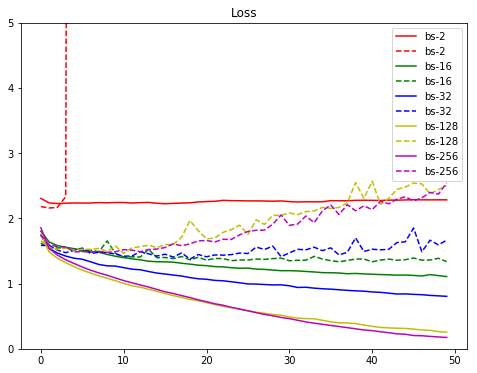

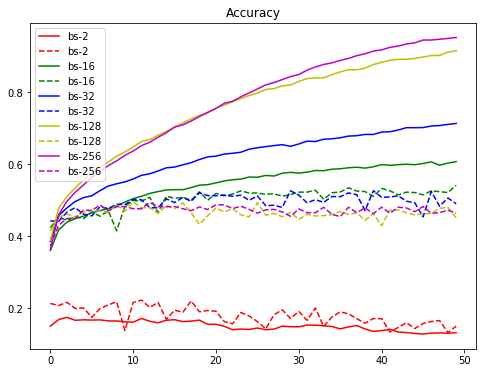

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# BN 放在 Activation 之前

In [9]:
from keras.layers import BatchNormalization
from keras.layers import Activation

def build_mlp_bn_before_act(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
            x = Activation("relu")(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            x = Activation("relu")(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
results = {}

for bs in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BATCH_SIZE = %d" % (bs))
    model = build_mlp_bn_before_act(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=bs, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name_tag = "bs-%d" % bs
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with BATCH_SIZE = 2
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_2 (Activation)   

50000/50000 [==============================] - 297s 6ms/step - loss: 2.2640 - accuracy: 0.1440 - val_loss: 2.2138 - val_accuracy: 0.1651
Epoch 44/50
50000/50000 [==============================] - 294s 6ms/step - loss: 2.2629 - accuracy: 0.1491 - val_loss: 2.2394 - val_accuracy: 0.1403
Epoch 45/50
50000/50000 [==============================] - 294s 6ms/step - loss: 2.2599 - accuracy: 0.1505 - val_loss: 2.2359 - val_accuracy: 0.1471
Epoch 46/50
50000/50000 [==============================] - 294s 6ms/step - loss: 2.2597 - accuracy: 0.1511 - val_loss: 2.2244 - val_accuracy: 0.1506
Epoch 47/50
50000/50000 [==============================] - 295s 6ms/step - loss: 2.2584 - accuracy: 0.1537 - val_loss: 2.2260 - val_accuracy: 0.1506
Epoch 48/50
50000/50000 [==============================] - 294s 6ms/step - loss: 2.2597 - accuracy: 0.1518 - val_loss: 2.2366 - val_accuracy: 0.1492
Epoch 49/50
50000/50000 [==============================] - 295s 6ms/step - loss: 2.2591 - accuracy: 0.1522 - val_loss:

50000/50000 [==============================] - 38s 766us/step - loss: 0.6440 - accuracy: 0.7725 - val_loss: 1.7616 - val_accuracy: 0.5021
Epoch 35/50
50000/50000 [==============================] - 38s 764us/step - loss: 0.6290 - accuracy: 0.7773 - val_loss: 1.7237 - val_accuracy: 0.5083
Epoch 36/50
50000/50000 [==============================] - 38s 764us/step - loss: 0.6161 - accuracy: 0.7813 - val_loss: 1.6222 - val_accuracy: 0.5231
Epoch 37/50
50000/50000 [==============================] - 38s 762us/step - loss: 0.5980 - accuracy: 0.7885 - val_loss: 1.6945 - val_accuracy: 0.5214
Epoch 38/50
50000/50000 [==============================] - 38s 762us/step - loss: 0.5899 - accuracy: 0.7922 - val_loss: 1.6549 - val_accuracy: 0.5327
Epoch 39/50
50000/50000 [==============================] - 38s 765us/step - loss: 0.5866 - accuracy: 0.7924 - val_loss: 1.7750 - val_accuracy: 0.5026
Epoch 40/50
50000/50000 [==============================] - 38s 764us/step - loss: 0.5740 - accuracy: 0.7980 - va

50000/50000 [==============================] - 21s 420us/step - loss: 0.4698 - accuracy: 0.8354 - val_loss: 2.1049 - val_accuracy: 0.4648
Epoch 27/50
50000/50000 [==============================] - 21s 419us/step - loss: 0.4504 - accuracy: 0.8405 - val_loss: 2.0874 - val_accuracy: 0.4736
Epoch 28/50
50000/50000 [==============================] - 21s 415us/step - loss: 0.4405 - accuracy: 0.8444 - val_loss: 2.0832 - val_accuracy: 0.4773
Epoch 29/50
50000/50000 [==============================] - 21s 418us/step - loss: 0.4165 - accuracy: 0.8526 - val_loss: 2.1466 - val_accuracy: 0.4768
Epoch 30/50
50000/50000 [==============================] - 21s 417us/step - loss: 0.4029 - accuracy: 0.8585 - val_loss: 2.0059 - val_accuracy: 0.4940
Epoch 31/50
50000/50000 [==============================] - 21s 415us/step - loss: 0.3877 - accuracy: 0.8608 - val_loss: 2.1473 - val_accuracy: 0.4842
Epoch 32/50
50000/50000 [==============================] - 21s 417us/step - loss: 0.3802 - accuracy: 0.8648 - va

50000/50000 [==============================] - 8s 157us/step - loss: 0.4417 - accuracy: 0.8559 - val_loss: 1.9625 - val_accuracy: 0.4582
Epoch 19/50
50000/50000 [==============================] - 8s 158us/step - loss: 0.4036 - accuracy: 0.8706 - val_loss: 1.8947 - val_accuracy: 0.4798
Epoch 20/50
50000/50000 [==============================] - 8s 157us/step - loss: 0.3640 - accuracy: 0.8860 - val_loss: 2.1596 - val_accuracy: 0.4357
Epoch 21/50
50000/50000 [==============================] - 8s 157us/step - loss: 0.3405 - accuracy: 0.8934 - val_loss: 2.1992 - val_accuracy: 0.4538
Epoch 22/50
50000/50000 [==============================] - 8s 158us/step - loss: 0.3156 - accuracy: 0.9011 - val_loss: 2.3021 - val_accuracy: 0.4522
Epoch 23/50
50000/50000 [==============================] - 8s 158us/step - loss: 0.2881 - accuracy: 0.9114 - val_loss: 2.0750 - val_accuracy: 0.4776
Epoch 24/50
50000/50000 [==============================] - 8s 158us/step - loss: 0.2607 - accuracy: 0.9212 - val_loss:

50000/50000 [==============================] - 6s 111us/step - loss: 0.9724 - accuracy: 0.6709 - val_loss: 1.5039 - val_accuracy: 0.4886
Epoch 11/50
50000/50000 [==============================] - 6s 111us/step - loss: 0.9161 - accuracy: 0.6930 - val_loss: 1.4604 - val_accuracy: 0.4971
Epoch 12/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.8675 - accuracy: 0.7108 - val_loss: 1.5124 - val_accuracy: 0.4841
Epoch 13/50
50000/50000 [==============================] - 6s 110us/step - loss: 0.8159 - accuracy: 0.7302 - val_loss: 1.5474 - val_accuracy: 0.4758
Epoch 14/50
50000/50000 [==============================] - 6s 112us/step - loss: 0.7660 - accuracy: 0.7494 - val_loss: 1.5526 - val_accuracy: 0.4846
Epoch 15/50
50000/50000 [==============================] - 6s 111us/step - loss: 0.7167 - accuracy: 0.7691 - val_loss: 1.5795 - val_accuracy: 0.4812
Epoch 16/50
50000/50000 [==============================] - 6s 112us/step - loss: 0.6706 - accuracy: 0.7853 - val_loss:

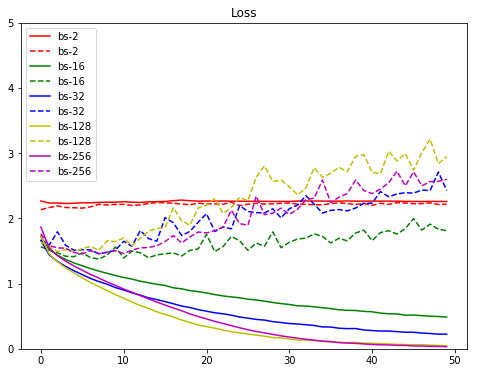

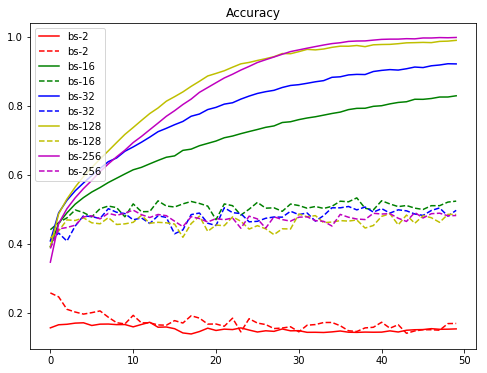

In [12]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# BN 放在 Input Layer 後

In [17]:
def build_mlp_bn_after_input(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    x = BatchNormalization()(input_layer)
    
    for i, n_units in enumerate(num_neurons):
        x = keras.layers.Dense(units=n_units, 
                               activation="relu", 
                               name="hidden_layer"+str(i+1))(x)

    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [18]:
results = {}

for bs in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BATCH_SIZE = %d" % (bs))
    model = build_mlp_bn_after_input(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=bs, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name_tag = "bs-%d" % bs
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with BATCH_SIZE = 2
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,751,178
Trainable params: 1,745,034
Non-trainable params: 6,144
______________

50000/50000 [==============================] - 309s 6ms/step - loss: 1.9340 - accuracy: 0.3107 - val_loss: 1.7033 - val_accuracy: 0.4059
Epoch 48/50
50000/50000 [==============================] - 309s 6ms/step - loss: 1.9333 - accuracy: 0.3144 - val_loss: 1.6963 - val_accuracy: 0.4255
Epoch 49/50
50000/50000 [==============================] - 317s 6ms/step - loss: 1.9202 - accuracy: 0.3202 - val_loss: 1.6598 - val_accuracy: 0.4232
Epoch 50/50
50000/50000 [==============================] - 316s 6ms/step - loss: 1.9226 - accuracy: 0.3173 - val_loss: 1.6815 - val_accuracy: 0.4317
Experiment with BATCH_SIZE = 16
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_____________________________________

50000/50000 [==============================] - 41s 829us/step - loss: 0.4585 - accuracy: 0.8396 - val_loss: 1.9895 - val_accuracy: 0.5455
Epoch 44/50
50000/50000 [==============================] - 42s 833us/step - loss: 0.4419 - accuracy: 0.8458 - val_loss: 2.0680 - val_accuracy: 0.5395
Epoch 45/50
50000/50000 [==============================] - 42s 830us/step - loss: 0.4468 - accuracy: 0.8438 - val_loss: 2.0126 - val_accuracy: 0.5427
Epoch 46/50
50000/50000 [==============================] - 41s 825us/step - loss: 0.4234 - accuracy: 0.8514 - val_loss: 2.0826 - val_accuracy: 0.5389
Epoch 47/50
50000/50000 [==============================] - 41s 829us/step - loss: 0.4285 - accuracy: 0.8517 - val_loss: 2.0683 - val_accuracy: 0.5395
Epoch 48/50
50000/50000 [==============================] - 41s 823us/step - loss: 0.4212 - accuracy: 0.8541 - val_loss: 2.0854 - val_accuracy: 0.5361
Epoch 49/50
50000/50000 [==============================] - 41s 827us/step - loss: 0.4183 - accuracy: 0.8538 - va

50000/50000 [==============================] - 22s 441us/step - loss: 0.2540 - accuracy: 0.9121 - val_loss: 2.4592 - val_accuracy: 0.5283
Epoch 40/50
50000/50000 [==============================] - 22s 446us/step - loss: 0.2472 - accuracy: 0.9131 - val_loss: 2.4504 - val_accuracy: 0.5398
Epoch 41/50
50000/50000 [==============================] - 22s 445us/step - loss: 0.2540 - accuracy: 0.9116 - val_loss: 2.5104 - val_accuracy: 0.5379
Epoch 42/50
50000/50000 [==============================] - 22s 446us/step - loss: 0.2366 - accuracy: 0.9176 - val_loss: 2.5363 - val_accuracy: 0.5339
Epoch 43/50
50000/50000 [==============================] - 22s 449us/step - loss: 0.2210 - accuracy: 0.9234 - val_loss: 2.5612 - val_accuracy: 0.5392
Epoch 44/50
50000/50000 [==============================] - 22s 445us/step - loss: 0.2189 - accuracy: 0.9234 - val_loss: 2.5724 - val_accuracy: 0.5304
Epoch 45/50
50000/50000 [==============================] - 22s 444us/step - loss: 0.2236 - accuracy: 0.9234 - va

50000/50000 [==============================] - 10s 195us/step - loss: 0.1406 - accuracy: 0.9549 - val_loss: 2.5920 - val_accuracy: 0.5224
Epoch 36/50
50000/50000 [==============================] - 10s 192us/step - loss: 0.1267 - accuracy: 0.9606 - val_loss: 2.6534 - val_accuracy: 0.5367
Epoch 37/50
50000/50000 [==============================] - 10s 195us/step - loss: 0.1227 - accuracy: 0.9621 - val_loss: 2.7144 - val_accuracy: 0.5185
Epoch 38/50
50000/50000 [==============================] - 10s 195us/step - loss: 0.1194 - accuracy: 0.9621 - val_loss: 2.7263 - val_accuracy: 0.5262
Epoch 39/50
50000/50000 [==============================] - 10s 197us/step - loss: 0.1085 - accuracy: 0.9660 - val_loss: 2.7981 - val_accuracy: 0.5279
Epoch 40/50
50000/50000 [==============================] - 10s 201us/step - loss: 0.1184 - accuracy: 0.9613 - val_loss: 2.8348 - val_accuracy: 0.5203
Epoch 41/50
50000/50000 [==============================] - 10s 196us/step - loss: 0.1035 - accuracy: 0.9671 - va

50000/50000 [==============================] - 7s 133us/step - loss: 0.3213 - accuracy: 0.9048 - val_loss: 1.8624 - val_accuracy: 0.5163
Epoch 32/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.2972 - accuracy: 0.9138 - val_loss: 1.8986 - val_accuracy: 0.5182
Epoch 33/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.2729 - accuracy: 0.9213 - val_loss: 2.0029 - val_accuracy: 0.5132
Epoch 34/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.2556 - accuracy: 0.9272 - val_loss: 2.0118 - val_accuracy: 0.5195
Epoch 35/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.2353 - accuracy: 0.9357 - val_loss: 2.0506 - val_accuracy: 0.5197
Epoch 36/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.2169 - accuracy: 0.9410 - val_loss: 2.1117 - val_accuracy: 0.5193
Epoch 37/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.1986 - accuracy: 0.9465 - val_loss:

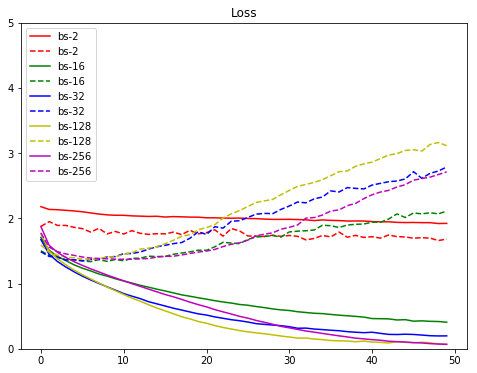

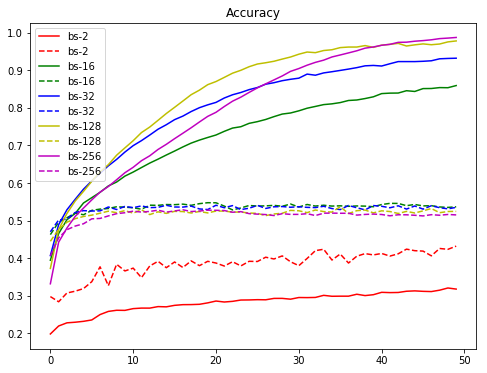

In [19]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()